In [12]:
import matplotlib.pyplot as plt 
import pandas as pd 
import pylab as pl 
import numpy as np 
%matplotlib inline


In [13]:
df = pd.read_csv(r"T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\my ml project\Polynomial Regression_ml\FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [14]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


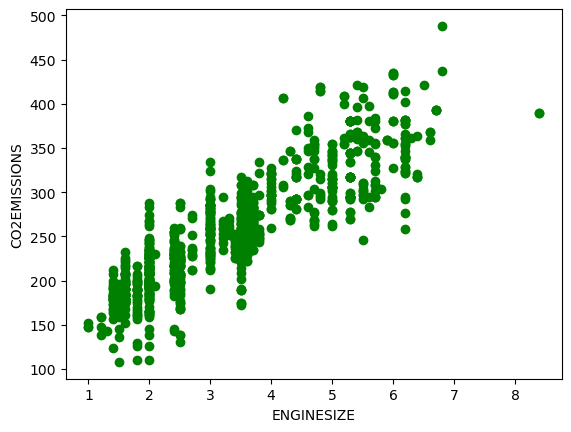

In [15]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color = 'green')
plt.xlabel ("ENGINESIZE")
plt.ylabel ("CO2EMISSIONS")
plt.show()


In [16]:
msk = np.random.rand(len(df)) < 0.8 
train = cdf[msk]
test = cdf[~msk]


# Polynomial regression
Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

$$y = b + \theta_1  x + \theta_2 x^2$$

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly



array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).   

The equation and the sample example is displayed below.   


$$
\begin{bmatrix}
    v_1\\\\\\
    v_2\\\\
    \vdots\\\\
    v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\\\
    [ 1 & v_2 & v_2^2]\\\\
    \vdots & \vdots & \vdots\\\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$$




$$
\begin{bmatrix}
    2.\\\\
    2.4\\\\
    1.5\\\\
    \vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
    [ 1 & 2. & 4.]\\\\
    [ 1 & 2.4 & 5.76]\\\\
    [ 1 & 1.5 & 2.25]\\\\
    \vdots & \vdots & \vdots\\\\
\end{bmatrix}
$$







In [18]:
lrg = linear_model.LinearRegression()
tarin_y_ = lrg.fit(train_x_poly,train_y)

print("Coifficients : ", lrg.coef_)
print("INtercept : ", lrg.intercept_)

Coifficients :  [[ 0.         27.99270492  4.63978443 -0.50705667]]
INtercept :  [130.78204026]


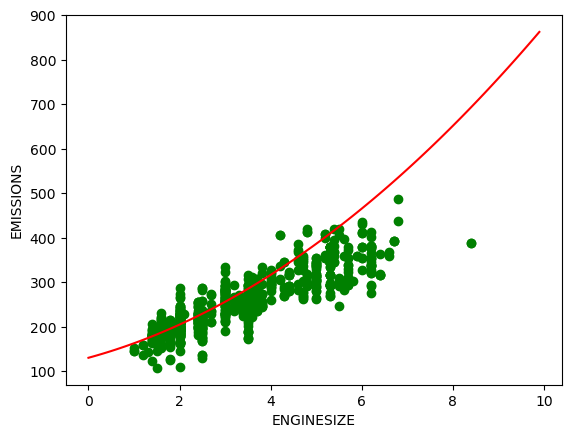

In [19]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color = 'green')
plt.xlabel ("ENGINESIZE")
plt.ylabel("EMISSIONS")

xx = np.arange(0.0,10.0,0.1) #Creates an array of values ranging from 0.0 to 10.0 with a step size of 0.1
yy = lrg.intercept_[0] + lrg.coef_[0][1]*xx + lrg.coef_[0][2] * np.power(xx,2)
plt.plot(xx , yy , '-r')


### yy = lrg.intercept_[0] + lrg.coef_[0][1]*xx + lrg.coef_[0][2] * np.power(xx,2)
clf.intercept_[0]:

The y-intercept of the regression model.
This is the predicted CO₂ emission when the engine size is 0.
clf.coef_[0][1]*XX:

The linear term in the regression equation.
clf.coef_[0][1] is the coefficient (slope) for the ENGINESIZE feature.
XX is the array of engine sizes created earlier.
clf.coef_[0][2]*np.power(XX, 2):

The quadratic term in the regression equation.
clf.coef_[0][2] is the coefficient for the squared engine size (ENGINESIZE²).
np.power(XX, 2) computes the square of each value in the XX array.
yy:

Represents the predicted CO₂ emissions for each value in XX, combining the linear and quadratic terms.

# Evaluation

In [20]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = lrg.predict(test_x_poly)

print("Mean absolute error : " ,  np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" ,  np.mean((test_y_ - test_y) ** 2 ))
print("R2-score: %.2f" , r2_score(test_y_,test_y))

Mean absolute error :  23.55178974768807
Residual sum of squares (MSE): %.2f 930.390238068103
R2-score: %.2f 0.7158508816731913
